# Matbench Dielectric Dataset

Exploratory Data Analysis (EDA). [MPContribs link](https://ml.materialsproject.org/projects/matbench_dielectric)


In [ ]:
# matminer needed for loading data
!pip install pymatviz matminer

In [ ]:
import plotly.express as px
import plotly.io as pio
from matminer.datasets import load_dataset
from tqdm import tqdm

from pymatviz import ptable_heatmap, spacegroup_hist, spacegroup_sunburst
from pymatviz.enums import Key
from pymatviz.utils import crystal_sys_from_spg_num


__author__ = "Janosh Riebesell"
__date__ = "2022-03-19"

# Interactive plotly figures don't show up on GitHub.
# https://github.com/plotly/plotly.py/issues/931
# change renderer from "svg" to "notebook" to get hover tooltips back
# (but blank plots on GitHub!)
pio.renderers.default = "png"

In [ ]:
df_diel = load_dataset("matbench_dielectric")
df_diel[[Key.spg_symbol, Key.spg_num]] = [
    struct.get_space_group_info() for struct in tqdm(df_diel[Key.structure])
]
df_diel[Key.crystal_system] = df_diel[Key.spg_num].map(crystal_sys_from_spg_num)

100%|██████████| 4764/4764 [00:05<00:00, 881.24it/s] 


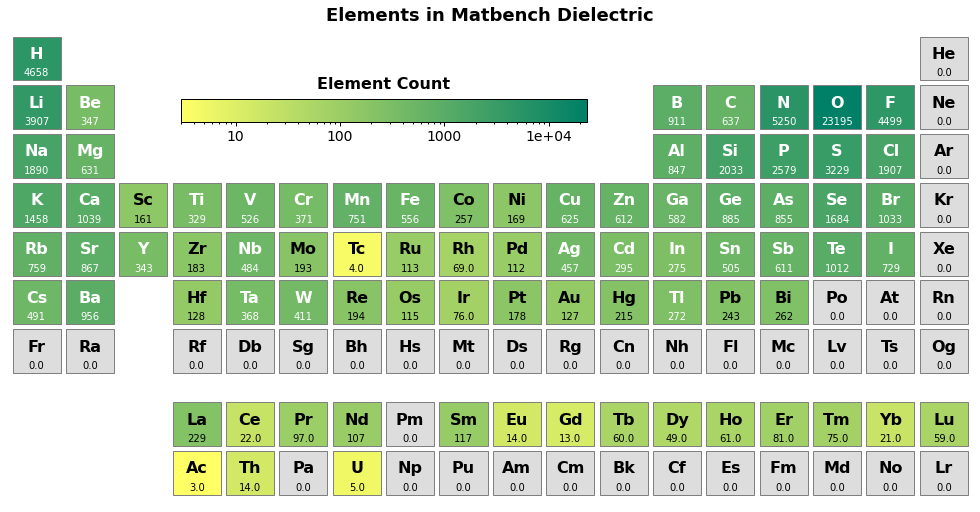

In [ ]:
df_diel[Key.volume] = df_diel[Key.structure].map(lambda cryst: cryst.volume)
df_diel[Key.formula] = df_diel[Key.structure].map(lambda cryst: cryst.formula)

ax = ptable_heatmap(df_diel[Key.formula], log=True)
ax.set(title="Elements in Matbench Dielectric")

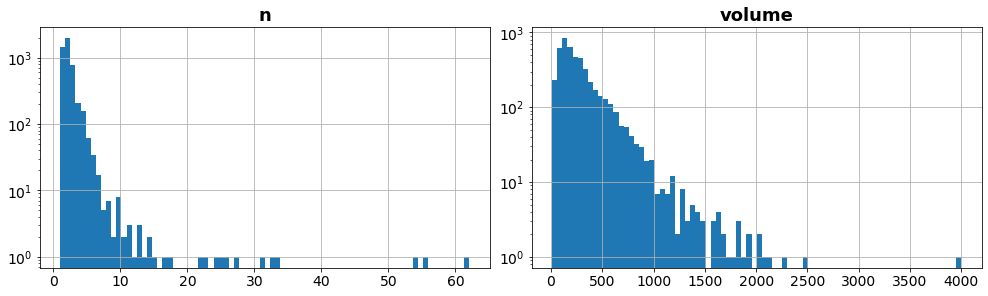

In [ ]:
_ = df_diel.hist(bins=80, log=True, figsize=(20, 4), layout=(1, 3))

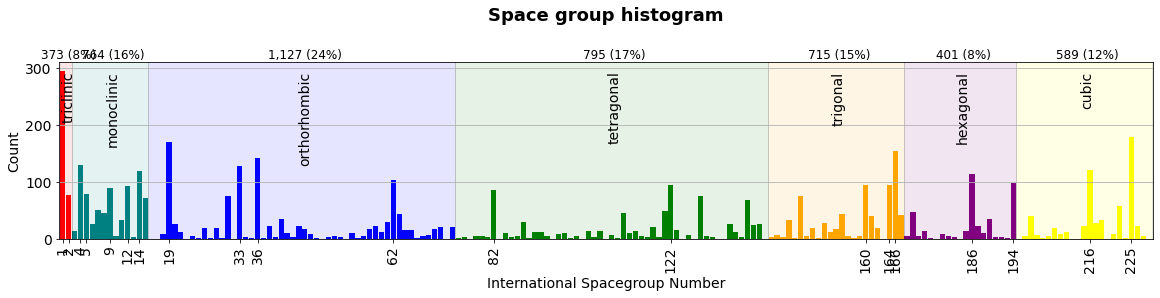

In [ ]:
ax = spacegroup_hist(df_diel[Key.spg_num])
_ = ax.set_title("Space group histogram", y=1.2)

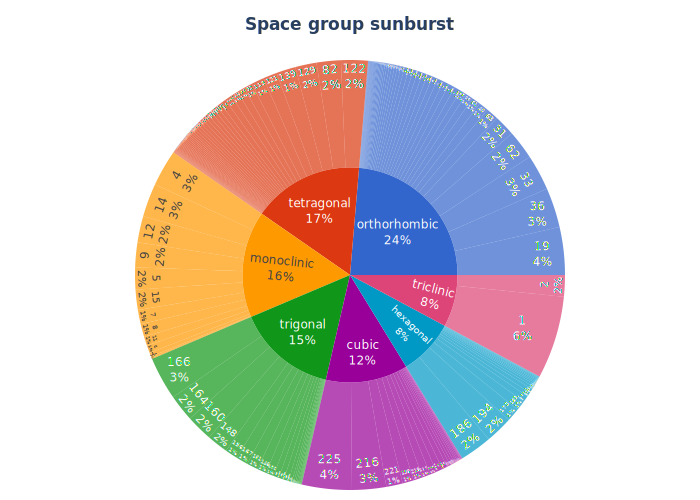

In [ ]:
fig = spacegroup_sunburst(df_diel[Key.spg_num], show_counts="percent")
fig.layout.title = dict(text="<b>Space group sunburst</b>", x=0.5)
fig.show()

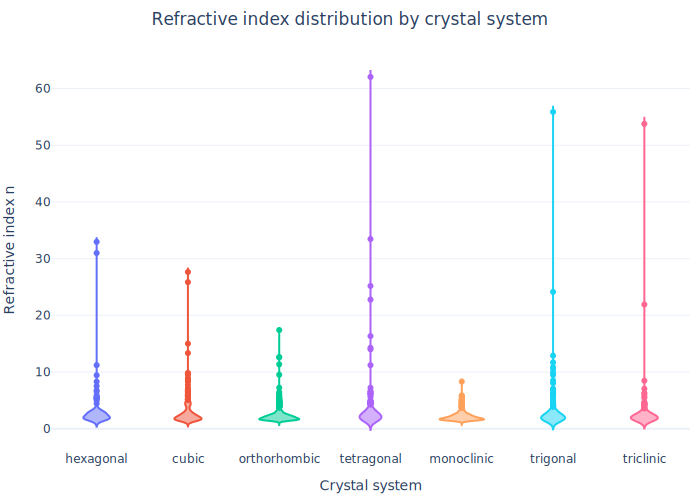

In [ ]:
fig = px.violin(df_diel, color=Key.crystal_system, x=Key.crystal_system, y="n")
title = "<b>Refractive index distribution by crystal system</b>"
fig.layout.title = dict(text=title, x=0.5)
fig.layout.margin = dict(b=10, l=10, r=10, t=50)
fig.layout.showlegend = False
fig.show()